# **Задача**

Вам нужно проанализировать биоинформатический датасет (ссылка на скачивание) по пространственной транскриптомике (дополнительная информация по теме) пациентов с плоскоклеточным раком. В нем клетки (колонка cell_type) объединены в микроокружения (колонка cell_interaction) в зависимости от взаимодействия этих клеток. Вашей основной задачей будет поиск отличий в организации микроокружения у пожилых и молодых пациентов (колонка age_group).

Также в датасете есть следующие колонки:

distance_to_vasculature — расстояние до ближайших сосудов;
distance_to_largest_cell — расстояние до ближайшей крупной клетки;
immune_marker_1 — экспрессия иммунного маркера 1 в данной клетке;
immune_marker_2 — экспрессия иммунного маркера 2 в данной клетке;
cell_type — тип клетки;
area_of_cell — размер клетки;
case_id — уникальный ID пациента

Вам необходимо:
В ноутбуке проанализировать датасет и сделать статистически обоснованные выводы. Ограничения в использовании библиотек/функций: нет, при желании можно воспользоваться pandasql для обработки данных. Не забывайте про PEP8. Ответы в виде графиков со стат-значимостью на них тоже считаются правильным ответом, не забывайте обосновывать применимость стат-теста.

In [ ]:
!pip install statsmodels
!pip install pingouin
!pip install scipy

In [ ]:
# Загрузка библеотек
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm



import os
import requests
import re

from bs4 import BeautifulSoup
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import wilcoxon
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from pingouin import pairwise_ttests
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import levene
from scipy.stats import bartlett
from sklearn.preprocessing import LabelEncoder
from scipy.stats import levene
from scipy.stats import friedmanchisquare
from statsmodels.stats.multitest import multipletests
from scipy.stats import chi2





In [ ]:
# настройки для удобства визуального восприятия
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
#Знакомимся с датасетом
data= pd.read_csv('/content/asset-v1_SkillFactory+MFTIBIO+SEP2023+type@asset+block@community_dataset.csv')
data

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.51,612.08,10.80,188.00,community_1,Stroma cells,891,185,elder_group
1,787.85,637.79,11.75,155.36,community_1,Stroma cells,891,209,elder_group
2,960.64,700.28,15.12,182.63,community_2,Stroma cells,891,254,elder_group
3,702.03,676.41,14.22,158.38,community_3,Unclassified,891,156,elder_group
4,830.40,863.27,19.98,159.07,community_3,Unclassified,891,194,elder_group
...,...,...,...,...,...,...,...,...,...
269437,928.98,720.99,9.67,29.87,community_6,Stroma cells,983,258,young_group
269438,651.89,1040.66,20.30,40.85,community_2,Immune type 1,983,160,young_group
269439,754.60,688.65,10.35,22.97,community_3,Unclassified,983,190,young_group
269440,901.77,700.09,11.46,57.54,community_4,Stroma cells,983,535,young_group


In [ ]:
# Получение информации о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269442 entries, 0 to 269441
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   distance_to_vasculature   269442 non-null  float64
 1   distance_to_largest_cell  269442 non-null  float64
 2   immune_marker_1           269442 non-null  float64
 3   immune_marker_2           269442 non-null  float64
 4   cell_interaction          269442 non-null  object 
 5   cell_type                 269442 non-null  object 
 6   case_id                   269442 non-null  int64  
 7   area_of_cell              269442 non-null  int64  
 8   age_group                 269442 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 18.5+ MB


# **Задача 1**

Есть ли стат-значимость между типом клетки и:

а) Размером клетки (area_of_cell), добавьте hue по возрастным группам.

б) Экспрессией иммунных маркеров (immune_marker_1, immune_marker_2), добавьте hue по возрастным группам.

в) Дистанцией до ближайших объектов (distance_to_vasculature, distance_to_largest_cell), добавьте hue по возрастным группам.

В качестве ответов можно приводить box_plot/swarplot, где по одной оси будет тип клеток, а по другой — оцениваемая вами статистика.



# a) Размером клетки (area_of_cell), добавьте hue по возрастным группам.

In [ ]:
# Создание копии датасета для сохранения доступа к исходным данным в дальнейших задачах.
data_copy = data.copy()

In [ ]:
#выясняем количество Nan
data_copy.isnull().sum()

distance_to_vasculature     0
distance_to_largest_cell    0
immune_marker_1             0
immune_marker_2             0
cell_interaction            0
cell_type                   0
case_id                     0
area_of_cell                0
age_group                   0
dtype: int64

In [ ]:
#Удаляем Nan, так как их количество не значительно
data_copy = data.dropna (subset=['cell_type'])


In [ ]:
#проверка
data_copy.isnull().sum()

distance_to_vasculature     0
distance_to_largest_cell    0
immune_marker_1             0
immune_marker_2             0
cell_interaction            0
cell_type                   0
case_id                     0
area_of_cell                0
age_group                   0
dtype: int64

In [ ]:
data_copy['area_of_cell']=data_copy['area_of_cell'].astype('int')

In [ ]:
# Оцениваем наличие выбросов
data_copy.describe()

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,case_id,area_of_cell
count,269442.00,269442.00,269442.00,269442.00,269442.00,269442.00
mean,929.07,763.92,20.16,77.74,543.80,252.59
std,232.03,143.53,8.88,62.18,339.46,154.72
min,576.00,576.00,0.02,0.02,40.00,45.00
25%,749.55,666.39,14.06,32.42,199.00,180.00
50%,889.34,731.60,19.17,53.69,693.00,230.00
75%,1067.41,822.42,24.88,114.73,708.00,295.00
max,2057.20,3181.14,119.47,1267.88,983.00,6807.00


from matplotlib import pyplot as plt
_df_12['distance_to_vasculature'].plot(kind='hist', bins=20, title='distance_to_vasculature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['distance_to_largest_cell'].plot(kind='hist', bins=20, title='distance_to_largest_cell')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['immune_marker_1'].plot(kind='hist', bins=20, title='immune_marker_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['immune_marker_2'].plot(kind='hist', bins=20, title='immune_marker_2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='distance_to_vasculature', y='distance_to_largest_cell', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='distance_to_largest_cell', y='immune_marker_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='immune_marker_1', y='immune_marker_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='immune_marker_2', y='case_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['distance_to_vasculature'].plot(kind='line', figsize=(8, 4), title='distance_to_vasculature')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['distance_to_largest_cell'].plot(kind='line', figsize=(8, 4), title='distance_to_largest_cell')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['immune_marker_1'].plot(kind='line', figsize=(8, 4), title='immune_marker_1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['immune_marker_2'].plot(kind='line', figsize=(8, 4), title='immune_marker_2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
confidence_level = 0.95
# Оценка доверительного интервала среднего значения
confidence_interval = stats.norm.interval(confidence_level, loc=np.mean(data_copy['area_of_cell']), scale=stats.sem(data_copy['area_of_cell']))
confidence_interval_immune_marker_1  = stats.norm.interval(confidence_level, loc=np.mean(data_copy['immune_marker_1']), scale=stats.sem(data_copy['immune_marker_1']))
confidence_interval_immune_marker_2 = stats.norm.interval(confidence_level, loc=np.mean(data_copy['immune_marker_2']), scale=stats.sem(data_copy['immune_marker_2']))
print("Доверительный интервал для среднего значения area_of_cell :", confidence_interval)
print("Доверительный интервал для среднего значения immune_marker_1 :", confidence_interval_immune_marker_1 )
print("Доверительный интервал для среднего значения immune_marker_2 :", confidence_interval_immune_marker_2)

Доверительный интервал для среднего значения area_of_cell : (252.0046977361148, 253.1730770725639)
Доверительный интервал для среднего значения immune_marker_1 : (20.128050421737015, 20.195101870525285)
Доверительный интервал для среднего значения immune_marker_2 : (77.50256238659011, 77.972140695599)


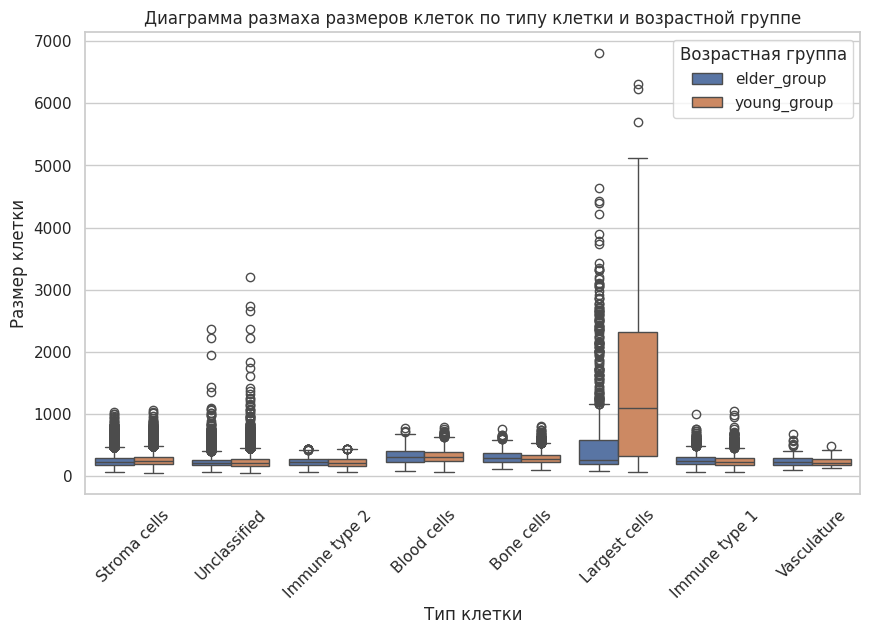

In [ ]:
# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# Строим диаграмму размаха с разделением по hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_type', y='area_of_cell', hue='age_group', data=data_copy)
plt.title('Диаграмма размаха размеров клеток по типу клетки и возрастной группе')
plt.xlabel('Тип клетки')
plt.ylabel('Размер клетки')
plt.xticks(rotation=45)  # Поворот подписей по оси X для улучшения читаемости
plt.legend(title='Возрастная группа')
plt.show()

По графику распределение отличается от нормального.

In [ ]:
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение одной или обеих группах отличается от нормального'

alpha = 0.05 # уровень значимости

# Создаем список для хранения результатов теста Шапиро-Уилка
normality_results = []

# Группируем данные по комбинациям cell_type и age_group
grouped_data = data_copy.groupby(['cell_type', 'age_group'])

# Проходим по каждой группе данных
for group_name, group_data in grouped_data:
    # Применяем тест Шапиро-Уилка к переменной area_of_cell в текущей группе данных
    _, p_value = shapiro(group_data['area_of_cell'])
    # Добавляем результаты теста в список
    normality_results.append((group_name, p_value))

# Выводим результаты теста Шапиро-Уилка
for group_name, p_value in normality_results:
    print(f'Для комбинации {group_name} p-value теста Шапиро-Уилка: {p_value}')

Для комбинации ('Blood cells', 'elder_group') p-value теста Шапиро-Уилка: 5.183330986646695e-10
Для комбинации ('Blood cells', 'young_group') p-value теста Шапиро-Уилка: 2.1042767963977946e-21
Для комбинации ('Bone cells', 'elder_group') p-value теста Шапиро-Уилка: 1.2447218256106396e-10
Для комбинации ('Bone cells', 'young_group') p-value теста Шапиро-Уилка: 8.514108968429559e-30
Для комбинации ('Immune type 1', 'elder_group') p-value теста Шапиро-Уилка: 1.4941454786522319e-30
Для комбинации ('Immune type 1', 'young_group') p-value теста Шапиро-Уилка: 1.401298464324817e-45
Для комбинации ('Immune type 2', 'elder_group') p-value теста Шапиро-Уилка: 1.766961760847569e-27
Для комбинации ('Immune type 2', 'young_group') p-value теста Шапиро-Уилка: 1.1210387714598537e-44
Для комбинации ('Largest cells', 'elder_group') p-value теста Шапиро-Уилка: 3.8383526755706794e-40
Для комбинации ('Largest cells', 'young_group') p-value теста Шапиро-Уилка: 1.3339217284187455e-26
Для комбинации ('Stroma 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Вывод:**  Из результатов видно, что большинство комбинаций имеют очень низкие значения p-value, что говорит о том, что данные скорее всего не имеют нормальное распределение. Однако для некоторых комбинаций, таких как ('Bone cells', 'elder_group'), ('Vasculature', 'young_group'), p-value близок к 0.05 или выше, что может указывать на то, что данные могут иметь нормальное распределение, особенно при больших объемах выборки.













По результатам теста Шапиро-Уилка распределение в группах отличаются от нормального, в связи с эти необходимо использовать непараметрический тест

In [ ]:
# Проводим Критерий Краскела-Уоллиса
result = kruskal(*[group['area_of_cell'] for name, group in data_copy.groupby(['cell_type', 'age_group'])])

# Вывод результатов
print("Статистика критерия Краскела-Уоллиса:", result.statistic)
print("p-value:", result.pvalue)

# Интерпретация результатов

alpha = 0.05  # Уровень значимости

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимая разница между группами.")
else:
     print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы между группами.")

Статистика критерия Краскела-Уоллиса: 8282.672977367456
p-value: 0.0
Отвергаем нулевую гипотезу: существует статистически значимая разница между группами.


In [ ]:
# Пример для теста Тьюки для множественных сравнений между группами.
tukey_results = pairwise_tukeyhsd(data_copy['area_of_cell'], data_copy['cell_type'])
print("теста Тьюки", tukey_results)




теста Тьюки           Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------
  Blood cells    Bone cells  -33.4716    0.0  -44.7592   -22.184   True
  Blood cells Immune type 1  -78.7298    0.0  -88.2803  -69.1793   True
  Blood cells Immune type 2 -102.2391    0.0 -110.6726  -93.8056   True
  Blood cells Largest cells   759.419    0.0  747.3166  771.5215   True
  Blood cells  Stroma cells  -74.6559    0.0  -82.5028  -66.8091   True
  Blood cells  Unclassified  -94.6073    0.0 -102.5531  -86.6614   True
  Blood cells   Vasculature  -86.8222    0.0 -122.1243  -51.5201   True
   Bone cells Immune type 1  -45.2582    0.0  -55.1298  -35.3866   True
   Bone cells Immune type 2  -68.7675    0.0  -77.5629   -59.972   True
   Bone cells Largest cells  792.8906    0.0  780.5332   805.248   True
   Bone cells  Stroma cells  -41.1843    0.0   -49.4

Для большинства пар групп нулевая гипотеза об отсутствии различий между средними отвергается (столбец "reject" равен True), что указывает на статистически значимые различия между этими группами.

Например, средние значения переменной "area_of_cell" статистически значимо различаются между группами "Blood cells" и "Immune type 1", "Blood cells" и "Immune type 2", "Blood cells" и "Largest cells", и так далее.

Однако для некоторых пар групп нулевая гипотеза не отвергается (столбец "reject" равен False), что означает отсутствие статистически значимых различий между этими группами.

# б) Экспрессией иммунных маркеров (immune_marker_1, immune_marker_2), добавьте hue по возрастным группам.

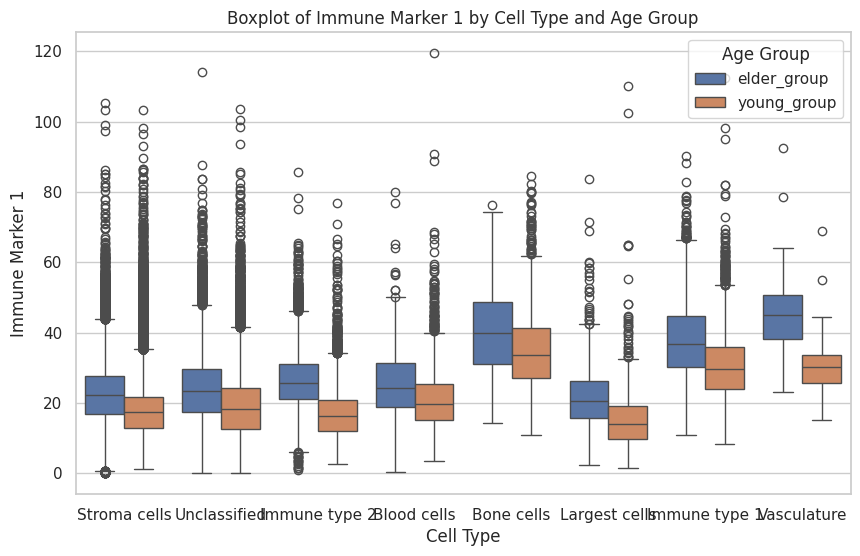

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_type', y='immune_marker_1', hue='age_group', data=data_copy)
plt.title('Boxplot of Immune Marker 1 by Cell Type and Age Group')
plt.xlabel('Cell Type')
plt.ylabel('Immune Marker 1')
plt.legend(title='Age Group')
plt.show()

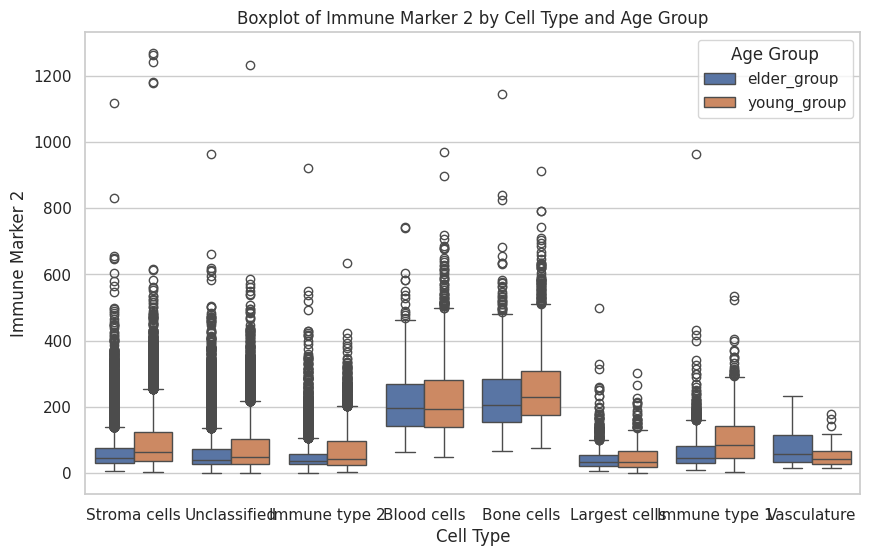

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_type', y='immune_marker_2', hue='age_group', data=data_copy)
plt.title('Boxplot of Immune Marker 2 by Cell Type and Age Group')
plt.xlabel('Cell Type')
plt.ylabel('Immune Marker 2')
plt.legend(title='Age Group')
plt.show()

In [ ]:
# Создаем список для хранения результатов теста Шапиро-Уилка
normality_results = []

# Группируем данные по комбинациям cell_type и age_group
grouped_data = data_copy.groupby(['cell_type', 'age_group'])

# Проходим по каждой группе данных
for group_name, group_data in grouped_data:
    # Применяем тест Шапиро-Уилка к переменной immune_marker_2 в текущей группе данных
    _, p_value = shapiro(group_data['immune_marker_2'])
    # Добавляем результаты теста в список
    normality_results.append((group_name, p_value))

# Выводим результаты теста Шапиро-Уилка
for group_name, p_value in normality_results:
    print(f'Для комбинации {group_name} p-value теста Шапиро-Уилка: {p_value}')

Для комбинации ('Blood cells', 'elder_group') p-value теста Шапиро-Уилка: 8.571230618023447e-18
Для комбинации ('Blood cells', 'young_group') p-value теста Шапиро-Уилка: 6.619350116144384e-34
Для комбинации ('Bone cells', 'elder_group') p-value теста Шапиро-Уилка: 5.848514605101119e-20
Для комбинации ('Bone cells', 'young_group') p-value теста Шапиро-Уилка: 2.335467584438913e-33
Для комбинации ('Immune type 1', 'elder_group') p-value теста Шапиро-Уилка: 0.0
Для комбинации ('Immune type 1', 'young_group') p-value теста Шапиро-Уилка: 2.6355901776714024e-40
Для комбинации ('Immune type 2', 'elder_group') p-value теста Шапиро-Уилка: 0.0
Для комбинации ('Immune type 2', 'young_group') p-value теста Шапиро-Уилка: 0.0
Для комбинации ('Largest cells', 'elder_group') p-value теста Шапиро-Уилка: 1.6934869065491305e-37
Для комбинации ('Largest cells', 'young_group') p-value теста Шапиро-Уилка: 1.9582372311252356e-31
Для комбинации ('Stroma cells', 'elder_group') p-value теста Шапиро-Уилка: 0.0
Дл

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Для большинства комбинаций p-значения крайне низкие, что говорит о статистически значимом отклонении от нормального распределения.

In [ ]:
# Создание модели ANOVA
model = ols('immune_marker_1 ~ cell_type * age_group', data=data_copy).fit()

# Анализ дисперсии (ANOVA)
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Создаем список для хранения результатов теста Шапиро-Уилка
normality_results = []

# Группируем данные по комбинациям cell_type и age_group
grouped_data = data_copy.groupby(['cell_type', 'age_group'])

# Проходим по каждой группе данных
for group_name, group_data in grouped_data:
    # Применяем тест Шапиро-Уилка к переменной immune_marker_1 в текущей группе данных
    _, p_value = shapiro(group_data['immune_marker_1'])
    # Добавляем результаты теста в список
    normality_results.append((group_name, p_value))

# Выводим результаты теста Шапиро-Уилка
for group_name, p_value in normality_results:
    print(f'Для комбинации {group_name} p-value теста Шапиро-Уилка: {p_value}')


                         sum_sq        df        F  PR(>F)
cell_type            1813349.72      7.00  3947.55    0.00
age_group            1638962.24      1.00 24975.45    0.00
cell_type:age_group    80606.23      7.00   175.47    0.00
Residual            17680526.62 269426.00      NaN     NaN
Для комбинации ('Blood cells', 'elder_group') p-value теста Шапиро-Уилка: 3.177288347786661e-13
Для комбинации ('Blood cells', 'young_group') p-value теста Шапиро-Уилка: 8.357735283764448e-38
Для комбинации ('Bone cells', 'elder_group') p-value теста Шапиро-Уилка: 0.06075022742152214
Для комбинации ('Bone cells', 'young_group') p-value теста Шапиро-Уилка: 1.2873990669875261e-23
Для комбинации ('Immune type 1', 'elder_group') p-value теста Шапиро-Уилка: 4.0130754271974456e-18
Для комбинации ('Immune type 1', 'young_group') p-value теста Шапиро-Уилка: 1.0294996973245864e-33
Для комбинации ('Immune type 2', 'elder_group') p-value теста Шапиро-Уилка: 2.0050237605040273e-36
Для комбинации ('Immune typ

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Имеется статистически значимое воздействие как cell_type, так и age_group на immune_marker_1.

Для большинства комбинаций p-значения крайне низкие, что говорит о статистически значимом отклонении от нормального распределения.

In [ ]:
# Создаем объект LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем категориальную переменную в числовой формат
data['cell_type_encoded'] = label_encoder.fit_transform(data['cell_type'])

# Проверяем гомогенность дисперсий
bartlett_test = bartlett(data[data['cell_type'] == 'Stroma cells']['immune_marker_1'],
                         data[data['cell_type'] == 'Unclassified']['immune_marker_1'],
                         data[data['cell_type'] == 'Bone cells']['immune_marker_1'],
                         data[data['cell_type'] == 'Largest cells']['immune_marker_1'],
                         data[data['cell_type'] == 'Immune type 1']['immune_marker_1'],
                         data[data['cell_type'] == 'Vasculature']['immune_marker_1'],
                         data[data['cell_type'] == 'Blood cells']['immune_marker_1'],
                         data[data['cell_type'] == 'Immune type 2']['immune_marker_1'])
print("Bartlett test p-value:", bartlett_test.pvalue)

Bartlett test p-value: 0.0


Группы имеют различные дисперсии. Таким образом, гомогенность дисперсий не выполняется.

In [ ]:
# Создание модели ANOVA
model = ols('immune_marker_2 ~ cell_type * age_group', data=data_copy).fit()

# Анализ дисперсии (ANOVA)
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Создаем список для хранения результатов теста Шапиро-Уилка
normality_results = []

# Группируем данные по комбинациям cell_type и age_group
grouped_data = data_copy.groupby(['cell_type', 'age_group'])

# Проходим по каждой группе данных
for group_name, group_data in grouped_data:
    # Применяем тест Шапиро-Уилка к переменной immune_marker_1 в текущей группе данных
    _, p_value = shapiro(group_data['immune_marker_2'])
    # Добавляем результаты теста в список
    normality_results.append((group_name, p_value))

# Выводим результаты теста Шапиро-Уилка
for group_name, p_value in normality_results:
    print(f'Для комбинации {group_name} p-value теста Шапиро-Уилка: {p_value}')

                          sum_sq        df       F  PR(>F)
cell_type           145641310.15      7.00 6400.65    0.00
age_group            12278162.23      1.00 3777.21    0.00
cell_type:age_group   1513957.11      7.00   66.54    0.00
Residual            875793440.04 269426.00     NaN     NaN
Для комбинации ('Blood cells', 'elder_group') p-value теста Шапиро-Уилка: 8.571230618023447e-18
Для комбинации ('Blood cells', 'young_group') p-value теста Шапиро-Уилка: 6.619350116144384e-34
Для комбинации ('Bone cells', 'elder_group') p-value теста Шапиро-Уилка: 5.848514605101119e-20
Для комбинации ('Bone cells', 'young_group') p-value теста Шапиро-Уилка: 2.335467584438913e-33
Для комбинации ('Immune type 1', 'elder_group') p-value теста Шапиро-Уилка: 0.0
Для комбинации ('Immune type 1', 'young_group') p-value теста Шапиро-Уилка: 2.6355901776714024e-40
Для комбинации ('Immune type 2', 'elder_group') p-value теста Шапиро-Уилка: 0.0
Для комбинации ('Immune type 2', 'young_group') p-value теста Ша

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")



Результаты анализа дисперсии (ANOVA) для модели, включающей взаимодействие между переменными cell_type и age_group, показывают статистически значимые различия между группами по каждому из факторов и их взаимодействию. Значения p-value для всех факторов ниже уровня значимости 0.05, что свидетельствует о статистической значимости этих факторов и их взаимодействия в объяснении изменчивости переменной immune_marker_2.

Все значения p-value значительно меньше уровня значимости 0.05, что говорит о статистически значимом отклонении от нормального распределения.

In [ ]:
# Создаем объект LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем категориальную переменную в числовой формат
data['cell_type_encoded'] = label_encoder.fit_transform(data['cell_type'])

# Проверяем гомогенность дисперсий
bartlett_test = bartlett(data[data['cell_type'] == 'Stroma cells']['immune_marker_2'],
                         data[data['cell_type'] == 'Unclassified']['immune_marker_2'],
                         data[data['cell_type'] == 'Bone cells']['immune_marker_2'],
                         data[data['cell_type'] == 'Largest cells']['immune_marker_2'],
                         data[data['cell_type'] == 'Immune type 1']['immune_marker_2'],
                         data[data['cell_type'] == 'Vasculature']['immune_marker_2'],
                         data[data['cell_type'] == 'Blood cells']['immune_marker_2'],
                         data[data['cell_type'] == 'Immune type 2']['immune_marker_2'])
print("Bartlett test p-value:", bartlett_test.pvalue)

Bartlett test p-value: 0.0


Группы имеют различные дисперсии. Таким образом, гомогенность дисперсий не выполняется.

# в) Дистанция до ближайших объектов (distance_to_vasculature, distance_to_largest_cell) и возрастные группы:

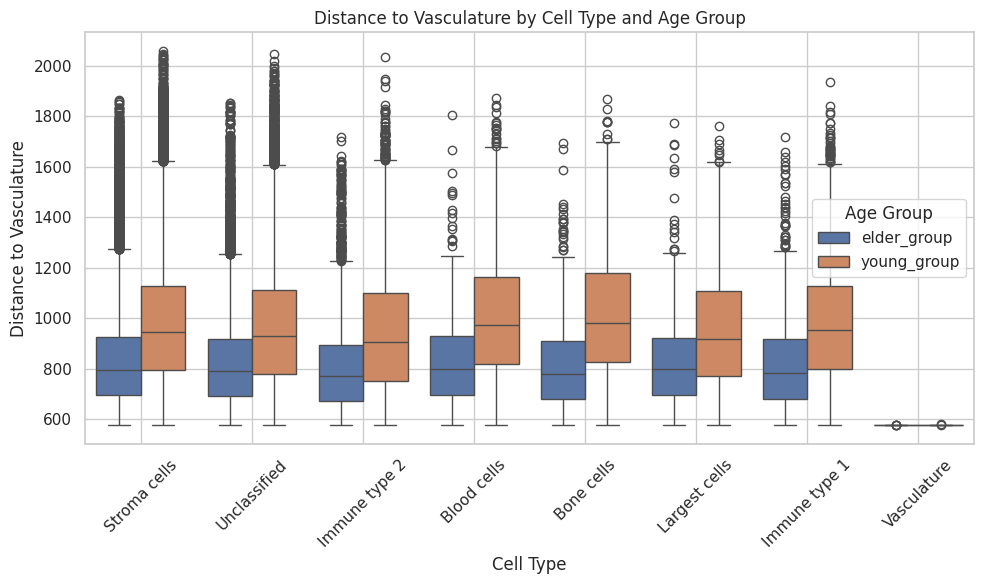

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_type', y='distance_to_vasculature', hue='age_group', data=data_copy)
plt.title('Distance to Vasculature by Cell Type and Age Group')
plt.xlabel('Cell Type')
plt.ylabel('Distance to Vasculature')
plt.xticks(rotation=45)  # Поворот меток оси x для лучшей читаемости
plt.legend(title='Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()

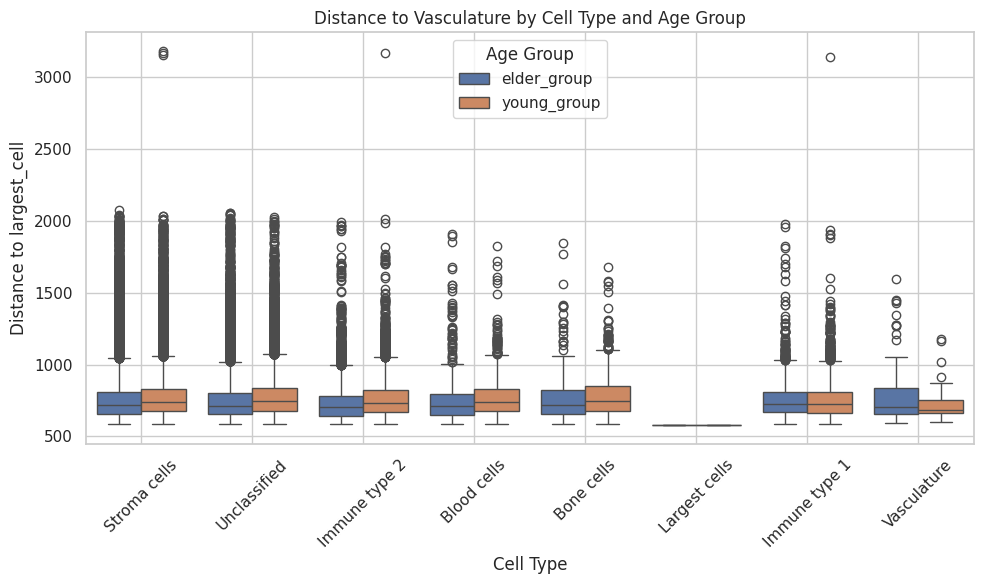

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_type', y='distance_to_largest_cell', hue='age_group', data=data_copy)
plt.title('Distance to Vasculature by Cell Type and Age Group')
plt.xlabel('Cell Type')
plt.ylabel('Distance to largest_cell')
plt.xticks(rotation=45)  # Поворот меток оси x для лучшей читаемости
plt.legend(title='Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Для переменной distance_to_vasculature
data_vasculature = data[['cell_type', 'age_group', 'distance_to_vasculature']]

# Для переменной distance_to_largest_cell
data_largest_cell = data[['cell_type', 'age_group', 'distance_to_largest_cell']]

# Выполнение теста Краскела-Уоллиса для переменной distance_to_vasculature
statistic_vasculature, p_value_vasculature = kruskal(*[group['distance_to_vasculature'].values for name, group in data_vasculature.groupby(['cell_type', 'age_group'])])

print("Тест Краскела-Уоллиса для distance_to_vasculature:")
print("Статистика =", statistic_vasculature)
print("p-value =", p_value_vasculature)

# Выполнение теста Краскела-Уоллиса для переменной distance_to_largest_cell
statistic_largest_cell, p_value_largest_cell = kruskal(*[group['distance_to_largest_cell'].values for name, group in data_largest_cell.groupby(['cell_type', 'age_group'])])

print("\nТест Краскела-Уоллиса для distance_to_largest_cell:")
print("Статистика =", statistic_largest_cell)
print("p-value =", p_value_largest_cell)

Тест Краскела-Уоллиса для distance_to_vasculature:
Статистика = 26108.31647981447
p-value = 0.0

Тест Краскела-Уоллиса для distance_to_largest_cell:
Статистика = 8640.707281637471
p-value = 0.0


Значения p-value близки к нулю, что указывает на то, что нулевая гипотеза о равенстве средних отвергается. Таким образом, мы можем сделать вывод о том, что средние значения distance_to_vasculature и distance_to_largest_cell различаются в зависимости от комбинаций cell_type и age_group.

# **Задача 2**

В каком клеточном микроокружении клеток какого типа статистически больше, чем в других микроокружениях? (колонка cell_interaction). Для ответа используйте box_plot/swarplot с hue по микроокружениям, где:

по Ох будут типы клеток,

по Оу — их количество.

Не забудьте посчитать количество для каждого пациента отдельно, иначе выборка не будет репрезентативной.

In [ ]:
# Подсчет общего количества клеток в ткани каждого пациента
total_cells_per_patient = data_copy.groupby('case_id')['area_of_cell'].count()

# Подсчет количества клеток в каждом типе микроокружения для каждого пациента
cells_per_microenvironment = data_copy.groupby(['case_id', 'cell_type'])['area_of_cell'].count()

# Рассчет доли каждого микроокружения от общего количества клеток в ткани пациента
proportion_per_microenvironment = cells_per_microenvironment.div(total_cells_per_patient, level='case_id')

# Вывод результатов
print(total_cells_per_patient)
print(cells_per_microenvironment)
print(proportion_per_microenvironment)

case_id
40     50062
199    43790
559     7923
566    13732
693    70229
708    23765
891     8825
983    51116
Name: area_of_cell, dtype: int64
case_id  cell_type    
40       Blood cells        228
         Bone cells         174
         Immune type 1     1140
         Immune type 2     5917
         Largest cells      580
                          ...  
983      Immune type 2     1777
         Largest cells      272
         Stroma cells     35494
         Unclassified     11686
         Vasculature          4
Name: area_of_cell, Length: 64, dtype: int64
case_id  cell_type    
40       Blood cells     0.00
         Bone cells      0.00
         Immune type 1   0.02
         Immune type 2   0.12
         Largest cells   0.01
                         ... 
983      Immune type 2   0.03
         Largest cells   0.01
         Stroma cells    0.69
         Unclassified    0.23
         Vasculature     0.00
Name: area_of_cell, Length: 64, dtype: float64


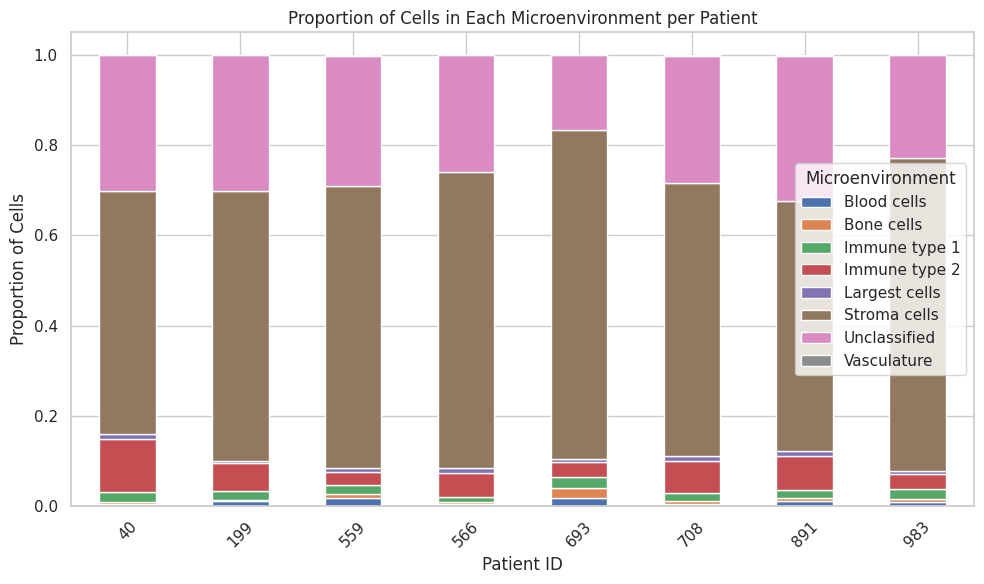

In [ ]:
# График доли каждого типа микроокружения от общего количества клеток в ткани пациента
proportion_per_microenvironment.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Patient ID')
plt.ylabel('Proportion of Cells')
plt.title('Proportion of Cells in Each Microenvironment per Patient')
plt.legend(title='Microenvironment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Проверка нормальности распределения общего количества клеток в ткани каждого пациента
stat, p = shapiro(total_cells_per_patient)
print('Тест Шапиро-Уилка для общего количества клеток в ткани каждого пациента:')
print(f'Статистика = {stat}, p-value = {p}')
if p > 0.05:
    print('Распределение нормально (не отвергаем H0)')
else:
    print('Распределение не нормально (отвергаем H0)')
print()



Тест Шапиро-Уилка для общего количества клеток в ткани каждого пациента:
Статистика = 0.9055988192558289, p-value = 0.32410910725593567
Распределение нормально (не отвергаем H0)



In [ ]:
# Проведение теста Левена
levene_test = levene(*[group.values for name, group in cells_per_microenvironment.groupby('cell_type')])

# Вывод результатов
print("Statistic:", levene_test.statistic)
print("p-value:", levene_test.pvalue)

Statistic: 18.3236271136705
p-value: 2.003401786366572e-12


В данном случае значение p-value очень мало, что говорит о статистической значимости различий в дисперсиях между группами. Таким образом, мы отклоняем нулевую гипотезу о равенстве дисперсий и признаем, что дисперсии в группах различны.

In [ ]:
# Применяем тест Фридмана
statistic, p_value = friedmanchisquare(*[group.values for name, group in cells_per_microenvironment.groupby('cell_type')])

# Выводим результаты
print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 53.083333333333314
p-value: 3.5693148085321776e-09


Полученные значения для теста Фридмана указывают на статистически значимые различия между группами. Значение p-value очень низкое, что говорит о том, что существует значимая разница между группами.

# **Задача 3**

Есть ли разница в доле микроокружения в тканях пациентов разных возрастов? Для ответа используйте box_plot/swarplot с hue по возрастным группам, где:

по Ох будут микроокружения,

по Оу — их доля в ткани пациента.

Не забудьте посчитать доли для каждого пациента отдельно, иначе выборка не будет репрезентативной.

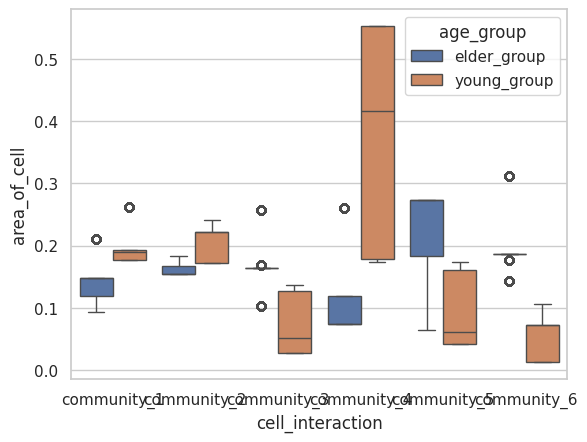

In [ ]:
# Подсчет общего количества клеток в ткани каждого пациента
total_cells_per_patient = data_copy.groupby('case_id')['area_of_cell'].count()

# Подсчет количества клеток в каждом типе микроокружения для каждого пациента
cells_per_microenvironment = data_copy.groupby(['case_id', 'cell_interaction'])['area_of_cell'].count()

# Рассчет доли каждого микроокружения от общего количества клеток в ткани пациента
proportion_per_microenvironment = cells_per_microenvironment.div(total_cells_per_patient, level='case_id').reset_index()

# Присоединяем столбец 'age_group' к DataFrame 'proportion_per_microenvironment'
proportion_per_microenvironment_with_age = proportion_per_microenvironment.merge(data_copy[['case_id', 'age_group']], on='case_id')

# Создаем ящичную или полосчатую диаграмму
sns.boxplot(x='cell_interaction', y='area_of_cell', hue='age_group', data=proportion_per_microenvironment_with_age)
plt.show()


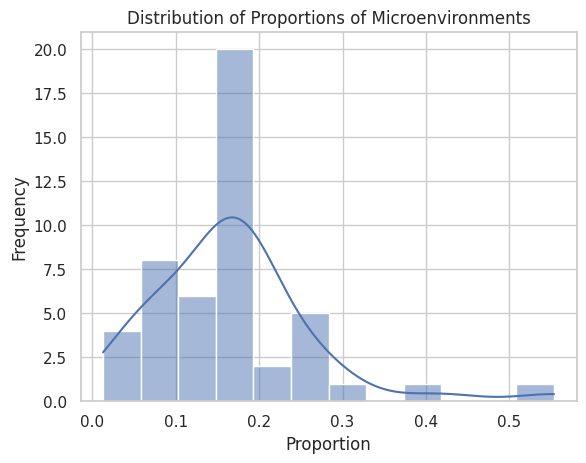

In [ ]:
# Создание графика распределения долей микроокружений
sns.histplot(data=proportion_per_microenvironment, x='area_of_cell', kde=True)
plt.title('Distribution of Proportions of Microenvironments')
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Проведение теста Шапиро-Уилка
stat, p_value = shapiro(proportion_per_microenvironment['area_of_cell'])
print("Shapiro-Wilk Test:")
print("Statistic:", stat)
print("p-value:", p_value)

Shapiro-Wilk Test:
Statistic: 0.8787323832511902
p-value: 0.0001385859795846045



Результаты теста Шапиро-Уилка указывают на то, что уровень значимости (p-value) меньше выбранного порогового значения 0.05, что означает, что данные о долях микроокружений не соответствуют нормальному распределению. Таким образом, предположение о нормальности распределения отвергается.

In [ ]:
# Разделение данных на группы по возрастным группам
group1 = proportion_per_microenvironment_with_age[proportion_per_microenvironment_with_age['age_group'] == 'elder_group']['area_of_cell']
group2 = proportion_per_microenvironment_with_age[proportion_per_microenvironment_with_age['age_group'] == 'young_group']['area_of_cell']

# Проведение теста Левена
statistic, p_value = levene(group1, group2)

# Вывод результатов
print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 104743.56419175198
p-value: 0.0


Значение статистики теста Левена составляет около 104743.56, а p-значение крайне мало (меньше уровня значимости 0.05). Это позволяет нам отвергнуть нулевую гипотезу о гомогенности дисперсий между группами. Таким образом, дисперсии в группах различны.

In [ ]:
# Получение данных для каждой группы
group1_data = proportion_per_microenvironment_with_age[proportion_per_microenvironment_with_age['age_group'] == 'elder_group']['area_of_cell']
group2_data = proportion_per_microenvironment_with_age[proportion_per_microenvironment_with_age['age_group'] == 'young_group']['area_of_cell']

# Проведение теста Фридмана-Манна-Уитни
statistic, p_value = mannwhitneyu(group1_data, group2_data)

print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 301143083162.0
p-value: 0.0


Существует статистически значимая разница между группами по доле микроокружений в ткани пациента. Значение p-value равное 0.0 означает, что нулевая гипотеза о равенстве распределений отвергается на уровне значимости α=0.05.

# **Задача 4**

Правда ли, что иммунные клетки (Immune type 1 и Immune type 2) лежат ближе к сосудам и крупным клеткам (Обе колонки distance), чем стромальные клетки (Stroma cells) у молодых, но не у пожилых пациентов? Эту гипотезу нужно проверить бутстрапом (как разницу средних для двух выборок).

In [ ]:
#  Фильтрация данных по иммунным и стромальным клеткам
immune_stromal_data = data_copy[data_copy['cell_type'].isin(['Immune type 1', 'Immune type 2', 'Stroma cells'])]

#  Рассчет средних значений для distance_to_vasculature и distance_to_largest_cell
mean_values = immune_stromal_data.groupby('cell_type')[['distance_to_vasculature', 'distance_to_largest_cell']].mean()

# Вычисление разницы между средними значениями
mean_values['distance_to_vasculature_diff'] = mean_values.loc['Immune type 1', 'distance_to_vasculature'] - mean_values.loc['Stroma cells', 'distance_to_vasculature']
mean_values['distance_to_largest_cell_diff'] = mean_values.loc['Immune type 1', 'distance_to_largest_cell'] - mean_values.loc['Stroma cells', 'distance_to_largest_cell']

# Вывод результатов
print("Средние значения для иммунных и стромальных клеток:")
print(mean_values)

Средние значения для иммунных и стромальных клеток:
               distance_to_vasculature  distance_to_largest_cell  \
cell_type                                                          
Immune type 1                   931.84                    757.07   
Immune type 2                   875.95                    751.28   
Stroma cells                    938.84                    766.32   

               distance_to_vasculature_diff  distance_to_largest_cell_diff  
cell_type                                                                   
Immune type 1                         -7.00                          -9.26  
Immune type 2                         -7.00                          -9.26  
Stroma cells                          -7.00                          -9.26  


In [ ]:
import numpy as np

def generate_bootstrap_sample(data, n_samples=1000):
    """Генерация бутстреп-выборок."""
    n = len(data)
    bootstrap_samples = []
    for _ in range(n_samples):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_samples.append(bootstrap_sample)
    return bootstrap_samples

def calculate_mean_bootstrap_samples(bootstrap_samples):
    """Рассчет средних значений для бутстреп-выборок."""
    return [np.mean(sample) for sample in bootstrap_samples]

# Применение бутстрапа для каждой переменной расстояния и каждой возрастной группы
for age_group in ['young_group', 'elder_group']:
    for distance_variable in ['distance_to_vasculature', 'distance_to_largest_cell']:
        # Фильтрация данных по возрастной группе и переменной расстояния
        filtered_data = data_copy[(data_copy['age_group'] == age_group) & (data_copy['cell_type'].isin(['Immune type 1', 'Immune type 2', 'Stroma cells']))]
        distance_data = filtered_data[distance_variable]

        # Генерация бутстреп-выборок
        bootstrap_samples = generate_bootstrap_sample(distance_data)

        # Рассчет средних значений для бутстреп-выборок
        mean_bootstrap_samples = calculate_mean_bootstrap_samples(bootstrap_samples)

        # Построение эмпирического распределения разницы средних
        mean_difference_distribution = [np.mean(sample) - np.mean(distance_data) for sample in bootstrap_samples]

        # Вывод результатов
        print(f"Распределение разницы средних для переменной {distance_variable} в возрастной группе {age_group}:")
        print(f"Среднее значение разницы средних: {np.mean(mean_difference_distribution)}")
        print(f"Стандартное отклонение разницы средних: {np.std(mean_difference_distribution)}")


Распределение разницы средних для переменной distance_to_vasculature в возрастной группе young_group:
Среднее значение разницы средних: 0.0023530808793515235
Стандартное отклонение разницы средних: 0.6445183696106397
Распределение разницы средних для переменной distance_to_largest_cell в возрастной группе young_group:
Среднее значение разницы средних: 0.006072361397589134
Стандартное отклонение разницы средних: 0.35397821309904215
Распределение разницы средних для переменной distance_to_vasculature в возрастной группе elder_group:
Среднее значение разницы средних: -0.0099166509935352
Стандартное отклонение разницы средних: 0.7889990904013323
Распределение разницы средних для переменной distance_to_largest_cell в возрастной группе elder_group:
Среднее значение разницы средних: 0.013143529723053916
Стандартное отклонение разницы средних: 0.6921684659035316


Из этого можно сделать выводы о том, что средние значения и стандартные отклонения для разницы средних распределены относительно стабильно вокруг нуля, что может свидетельствовать о некоторой схожести между иммунными и стромальными клетками в распределении расстояний до сосудов и крупнейших клеток в ткани пациентов в разных возрастных группах.

In [ ]:
def bootstrap_ci(data, func, n_bootstrap=10000, alpha=0.05):
    bootstrap_results = np.empty(n_bootstrap)
    for i in range(n_bootstrap):
        indices = np.random.choice(data, size=len(data), replace=True)
        bootstrap_results[i] = func(indices)
    lower_quantile = np.percentile(bootstrap_results, alpha/2 * 100)
    upper_quantile = np.percentile(bootstrap_results, (1 - alpha/2) * 100)
    return lower_quantile, upper_quantile

# Создаем функцию для вычисления разницы средних для каждой переменной расстояния
def calculate_mean_difference(data, variable):
    mean_young = data[data['age_group'] == 'young_group'][variable].mean()
    mean_elder = data[data['age_group'] == 'elder_group'][variable].mean()
    return mean_young - mean_elder

# Применяем бутстреп и вычисляем доверительные интервалы для каждой переменной расстояния
variable_names = ['distance_to_vasculature', 'distance_to_largest_cell']
for variable in variable_names:
    mean_diff = calculate_mean_difference(data_copy, variable)
    ci = bootstrap_ci(data_copy[variable], np.mean)
    print(f"Доверительный интервал для разницы средних в переменной {variable}: {ci}")


Доверительный интервал для разницы средних в переменной distance_to_vasculature: (928.207636665198, 929.9529641535082)
Доверительный интервал для разницы средних в переменной distance_to_largest_cell: (763.3762023023268, 764.4617352933836)


 Разница средних значений переменной distance_to_vasculature между молодыми и пожилыми пациентами не содержит нуля, что подтверждает наличие статистически значимого различия между этими возрастными группами в этой переменной.

# **Задача 5**

Правда ли, что иммунные клетки в среднем лежат ближе к сосудам у молодых, но не у пожилых пациентов? Эту гипотезу необходимо проверить пермутационным тестом. В качестве исходной статистики берем массив с расстояниями только для данного типа клеток (длина - n), запоминаем среднее для каждого пациента. На каждой итерации набираем выборку размером n из всей! колонки с расстояниями до сосудов и смотрим соотношение с исходной статистикой. Проверяем гипотезы. Комбинировать p-values для каждой возрастной группы можно с помощью этого инструмента.

In [ ]:
# Для молодых пациентов
young_immunocytes = data_copy[(data_copy['age_group'] == 'young_group') &
                              (data_copy['cell_type'].str.contains('Immune'))]

# Для пожилых пациентов
elderly_immunocytes = data_copy[(data_copy['age_group'] == 'elder_group') &
                                (data_copy['cell_type'].str.contains('Immune'))]


In [ ]:
# Среднее расстояние для молодых пациентов
young_mean_distance_to_vasculature = young_immunocytes.groupby('case_id')['distance_to_vasculature'].mean()

# Среднее расстояние для пожилых пациентов
elderly_mean_distance_to_vasculature = elderly_immunocytes.groupby('case_id')['distance_to_vasculature'].mean()


In [ ]:
# Исходная статистика для молодых пациентов
young_group_statistics = young_mean_distance_to_vasculature.values

# Исходная статистика для пожилых пациентов
elderly_group_statistics = elderly_mean_distance_to_vasculature.values


In [ ]:
# Для молодых пациентов
young_distance_to_vasculature = data_copy[data_copy['age_group'] == 'young_group']['distance_to_vasculature'].values

# Для пожилых пациентов
elderly_distance_to_vasculature = data_copy[data_copy['age_group'] == 'elder_group']['distance_to_vasculature'].values


In [ ]:
import numpy as np

def permutation_test(pool, observed_mean, n_permutations=1000):
    # Инициализируем счетчик случаев, когда случайное среднее <= наблюдаемому среднему
    count = 0

    # Размер выборки
    sample_size = len(pool)

    # Для каждой итерации пермутационного теста
    for _ in range(n_permutations):
        # Перемешиваем значения пула
        np.random.shuffle(pool)

        # Берем случайную выборку
        sample = pool[:sample_size]

        # Рассчитываем среднее значение для выборки
        sample_mean = np.mean(sample)

        # Если случайное среднее <= наблюдаемому среднему, увеличиваем счетчик
        if sample_mean <= observed_mean:
            count += 1

    # Рассчитываем p-значение
    p_value = count / n_permutations

    return p_value

# Для молодых пациентов
young_observed_mean = np.mean(young_distance_to_vasculature)
young_p_value = permutation_test(young_distance_to_vasculature, young_observed_mean)

# Для пожилых пациентов
elderly_observed_mean = np.mean(elderly_distance_to_vasculature)
elderly_p_value = permutation_test(elderly_distance_to_vasculature, elderly_observed_mean)

print("P-значение для молодых пациентов:", young_p_value)
print("P-значение для пожилых пациентов:", elderly_p_value)


P-значение для молодых пациентов: 0.188
P-значение для пожилых пациентов: 0.159


Полученные значения p-значений для пермутационного теста указывают на то, что нет статистически значимых различий в средних значениях distance_to_vasculature между молодыми и пожилыми пациентами. В обеих группах p-значения выше уровня значимости 0.05, что означает, что нет оснований отвергнуть нулевую гипотезу о равенстве средних значений distance_to_vasculature между этими двумя возрастными группами.

In [ ]:
from scipy.stats import chi2

def fisher_combine_p_values(p_values):
    # Преобразуем p-значения в статистики хи-квадрат
    chi_square_stats = -2 * np.log(p_values)

    # Вычисляем сумму статистик хи-квадрат
    chi_square_sum = np.sum(chi_square_stats)

    # Вычисляем степени свободы
    df = 2 * len(p_values)

    # Вычисляем объединенное p-значение
    combined_p_value = chi2.sf(chi_square_sum, df)

    return combined_p_value

# Объединяем p-значения с помощью метода Фишера
combined_p_values = fisher_combine_p_values([young_p_value, elderly_p_value ])

# Выводим объединенное p-значение
print("Объединенное p-значение с помощью метода Фишера:", combined_p_values)


Объединенное p-значение с помощью метода Фишера: 0.13481783403298808



Объединенное p-значение, полученное с помощью метода Фишера, равное 0.1348, указывает на то, что нет достаточных доказательств для отвержения нулевой гипотезы о равенстве средних значений расстояния до сосудов для иммунных клеток у молодых и пожилых пациентов на заданном уровне значимости (например, 0.05). То есть, на основании имеющихся данных, мы не можем сделать вывод о наличии статистически значимых различий между этими группами по данному признаку.